# Creating  Map Overlays

Created and tested by A. Newman on 9/23/2022

It may have started to be apparent in the last notebook, but figures are drawn as overlays.  This means that once something is created, the next object is plotted as a layer over the original.  

Through the superposition of a few (or many) individual plotting commands, you can create and automate some very complex plots.

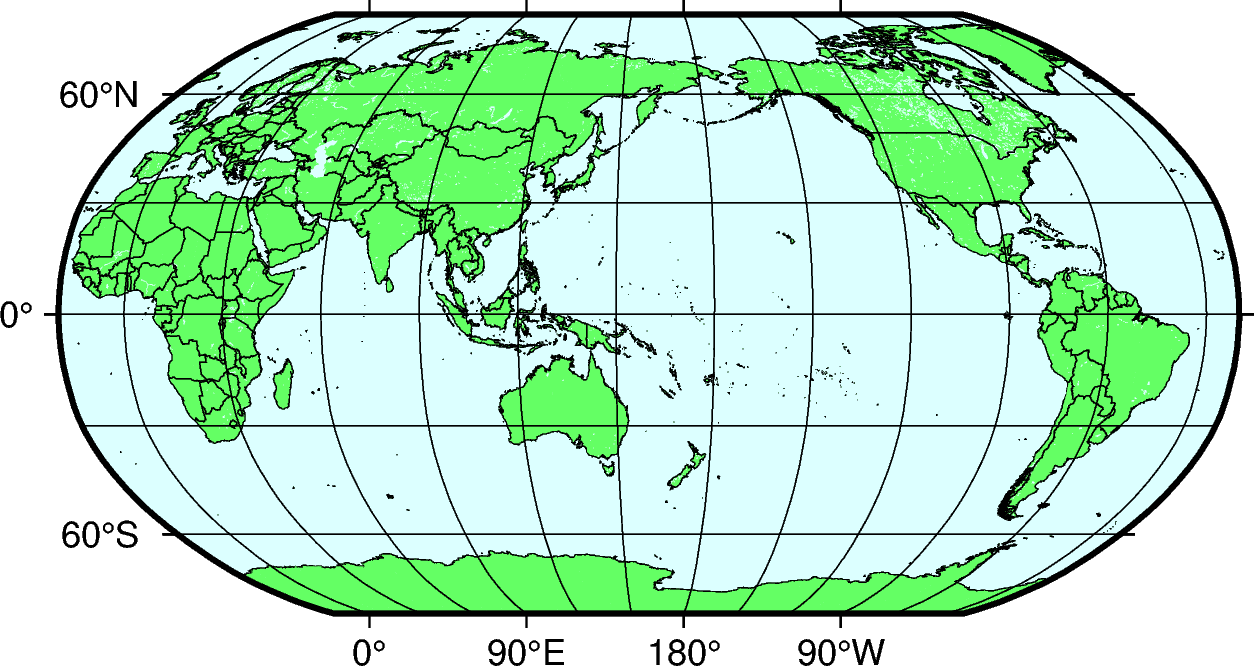

In [12]:
import pygmt

fig1=pygmt.Figure()
fig1.coast(projection='N-200/10c',  #Robins plot from before
           region='g',   
           frame=['WSen','xag30', 'yag30'], 
           land='100/255/100', water='220/255/255',shorelines='1/0.2p',
           resolution='l', 
           borders=1
          )
fig1.show()

### a second figure
mollweide from before

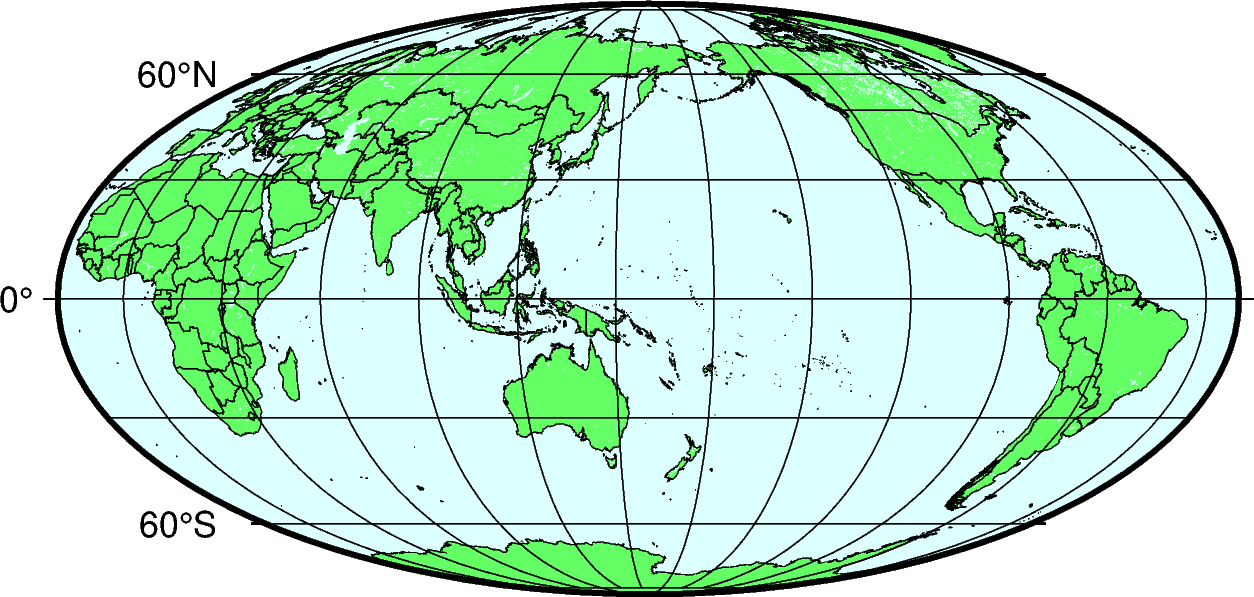

In [13]:
fig2=pygmt.Figure()
fig2.coast(projection='W-200/10c',  #pacific-centric w/o chopping Africa
           region='g',  # global 
           frame=['WSen','xag30', 'yag30'], 
           land='100/255/100', water='220/255/255',shorelines='1/0.2p',
           resolution='l', 
           borders=1
          )
fig2.show()

### Adding overlays
Appending the second plot with a Star over Atlanta

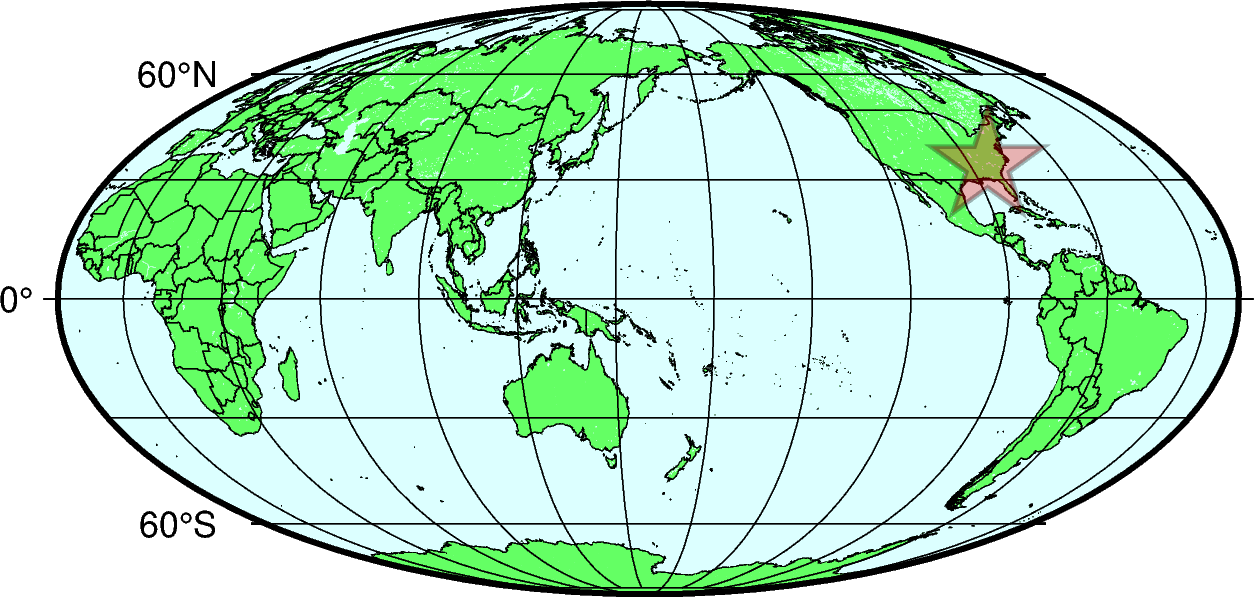

In [14]:
fig2.plot(x=-84,y=34,
          style='a1c', # a 1cm star
          color='red', pen='1p,black',transparency=70 # semi-transparent
         )
fig2.show()

### can plot on old plots too.

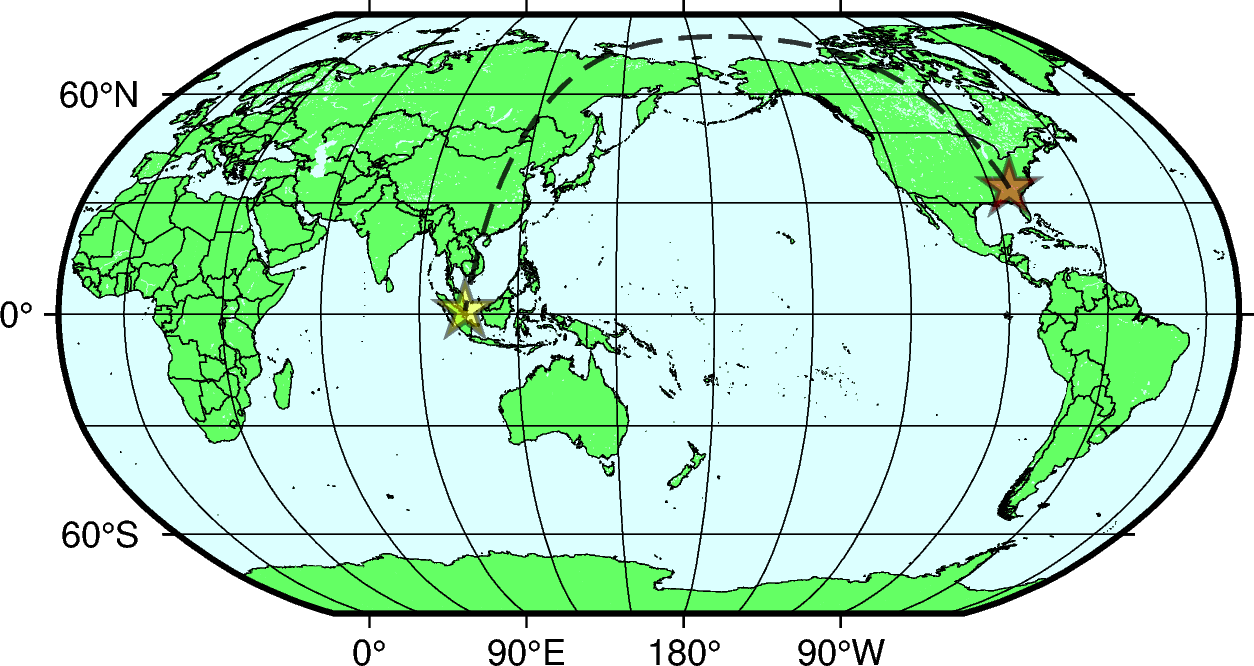

In [15]:
# overlaying prior Robinson map

# adding second location and path between them

# Atlanta
fig1.plot(x=-84,y=34,style='a0.5c', color='red', pen='1p,black',transparency=50)
# Singapore
fig1.plot(x=104,y=1,style='a0.5c', color='yellow', pen='1p,black',transparency=50)

# great circle line between them
fig1.plot(x=[-84,104],y=[34,1],pen='1p,black,dashed',transparency=20)
fig1.show()


### Fresh plot -- some background features are too strong, 
making plot more difficult to read.  Will redo, but with some further refinements

In [16]:
# defining parameters at beginning  (great standard practice)
ATL=[[-84,34]]  # Define Atlanta as a single paired row list
SIN=[[104,1]]  # Singapore as another and separete paired row
FlightPath=[ATL[0],SIN[0]]  # takes first row of each array

cLon=-200 
xScale='10c'
landColor='100/255/100'  #lightish-green
seaColor='220/255/255'  #very light-blue

fig1=pygmt.Figure() # redefine  (won't overlay old map)
fig1.coast(projection='N'+str(cLon)+'/'+xScale,  #pacific-centric w/o chopping Africa
           #projection='W-200/10c',  #Change projection to Mollweide
           region='g',  # global 
           #frame=['WSen','xa90', 'ya30'], # no plotting of axes/frames yet.
           land=landColor, water=seaColor,shorelines='1/0.2p',
           transparency=70, # added transparncy
           resolution='l', 
           borders=1
          )

# great circle line between them
fig1.plot(FlightPath,pen='1p,black,dashed',transparency=20)
# straight-line path
fig1.plot(FlightPath,pen='1p,black,..-',straight_line=True,transparency=30)

# Atlanta
fig1.plot(ATL,style='a0.5c', color='red', pen='1p,black',transparency=50)
# Singapore
fig1.plot(SIN,style='a0.5c', color='yellow', pen='1p,black',transparency=50)

#fig1.text(text=['Atlanta','Singapore'],x=FlightPath[:,0])
# draw basemap outline without tranparency
fig1.basemap(frame=['WSen','xa90', 'ya30']) # removed gridding

fig1.show()

GMTInvalidInput: Must provided both x and y.

### Load data as Pandas DataFrames

In [17]:
import pandas as pd
Cities=pd.DataFrame([[-84, 34,"Atlanta"], 
                     [103.82, 1.35,"Singapore"]],
                    columns=['Lon','Lat','Name'])
print(Cities)  
# Cities.head()

      Lon    Lat       Name
0  -84.00  34.00    Atlanta
1  103.82   1.35  Singapore


In [18]:
cLon=-200 
xScale='10c'
landColor='100/255/100'  #lightish-green
seaColor='220/255/255'  #very light-blue

fig1=pygmt.Figure() # redefine  (won't overlay old map)

fig1.coast(projection='N'+str(cLon)+'/'+xScale,  #pacific-centric w/o chopping Africa
           #projection='W-200/10c',  #Change projection to Mollweide
           region='g',  # global 
           #frame=['WSen','xa90', 'ya30'], # no plotting of axes/frames yet.
           land=landColor, water=seaColor,shorelines='1/0.2p',
           transparency=70, # added transparncy
           resolution='l', 
           borders=1
          )

# great circle line between them
fig1.plot(x=Cities.Lon,y=Cities.Lat,
          pen='1p,black,dashed',transparency=20,
          label='Great Circle Path'
         )
# straight-line path
fig1.plot(x=Cities.Lon,y=Cities.Lat,
          pen='1p,black,..-',straight_line=True,transparency=30,
          label='Straight Line Path'
         )

fig1.plot(x=Cities.Lon[0],y=Cities.Lat[0],style='a0.5c', color='red', pen='1p,black',transparency=50)
# Singapore
fig1.plot(x=Cities.Lon[1],y=Cities.Lat[1],style='a0.5c', color='yellow', pen='1p,black',transparency=50)

#Use Justification
#fig1.text(text=Cities.Name,x=Cities.Lon,y=Cities.Lat,justify='TL')

# use your own math offset    
fig1.text(text=Cities.Name,x=Cities.Lon+10,y=Cities.Lat-10)

# draw basemap outline without tranparency
fig1.basemap(frame=['WSen','xa90', 'ya30']) # removed gridding
fig1.show()

plot [ERROR]: Cannot find file Circle
plot [ERROR]: Cannot find file Path


GMTCLibError: Module 'plot' failed with status code 72:
plot [ERROR]: Cannot find file Circle
plot [ERROR]: Cannot find file Path

## Add legend


legend [WARNING]: File <stdin> is empty!


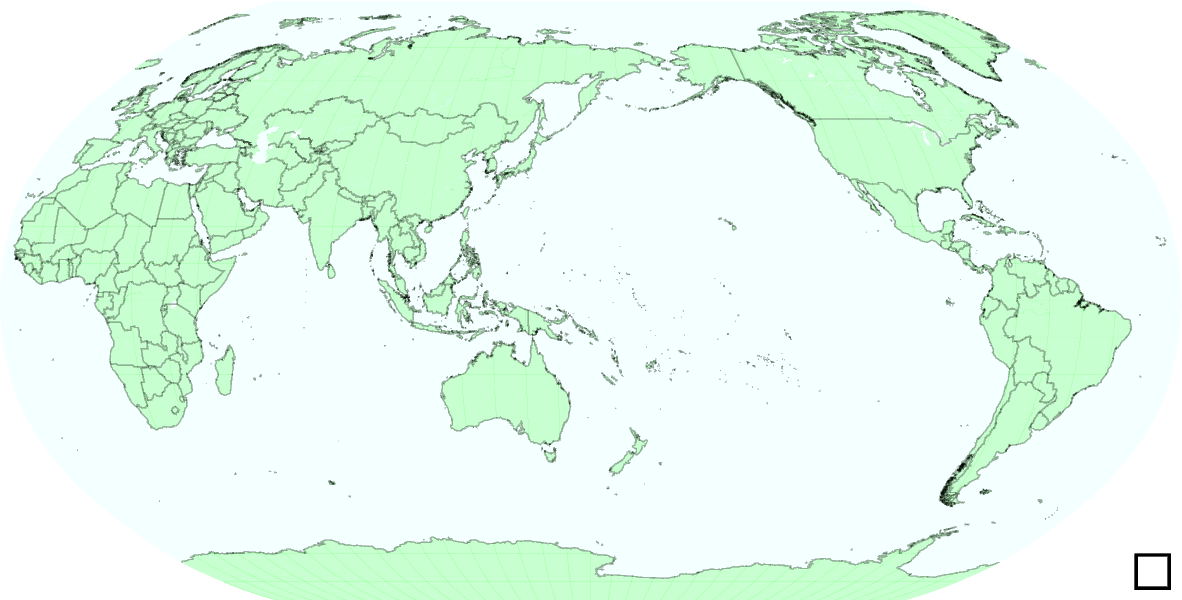

In [19]:
fig1.legend(position='JBR+jBR+o0.1c',
           box='+gwhite+p0.7p',
           )

fig1.show()

## Save plot

In [11]:
# below will both save in a variety of formats, 
# but will also display plot in an external viewer
fig1.savefig('ATL-SIN.pdf',  # types include png,jpg,pdf,bmp,tif,eps,kml
            transparent=False, # transp background for png only
            crop=True, # removes whitespace around fig
            anti_alias=True, # creates smoother plots
            show=True, # display externally too
            dpi=300 #this is default for png
            )
# recall the plot width you defined before.  This decides how big your plots become